In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
from uszipcode import SearchEngine
search = SearchEngine(SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

# EDA on the relationship between variables and the results

In [33]:
def get_pop(zipcode):
    return search.by_zipcode(zipcode).population_density

def get_city(zipcode):
    return search.by_zipcode(zipcode).major_city

In [16]:
df = pd.read_csv('./data/processed/main.csv')
df.head()

,Zipcode,bike_rental,parking,public_transport,schools,shop,population_density,city
0,50309,24,2,196,0,100,1914.0,Des Moines
1,50311,8,0,46,0,34,6011.0,Des Moines
2,50312,2,2,52,0,44,2701.0,Des Moines
3,50314,4,0,92,0,6,5014.0,Des Moines
4,50315,2,0,2,4,28,3578.0,Des Moines


In [34]:
df['population_density'] = df['Zipcode'].apply(get_pop)
df['city'] = df['Zipcode'].apply(get_city)

In [35]:
df.head()

,Zipcode,bike_rental,parking,public_transport,schools,shop,population_density,city
0,50309,24,2,196,0,100,1914.0,Des Moines
1,50311,8,0,46,0,34,6011.0,Des Moines
2,50312,2,2,52,0,44,2701.0,Des Moines
3,50314,4,0,92,0,6,5014.0,Des Moines
4,50315,2,0,2,4,28,3578.0,Des Moines


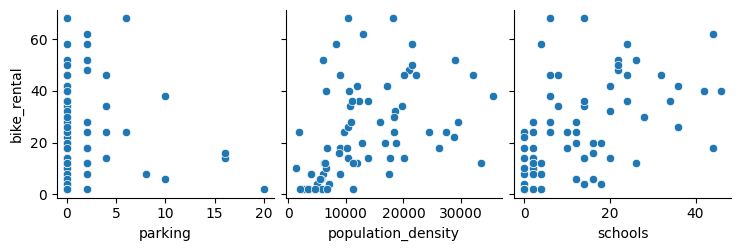

In [21]:
sns.pairplot(df, x_vars=['parking', 'population_density', 'schools'], y_vars=['bike_rental'])

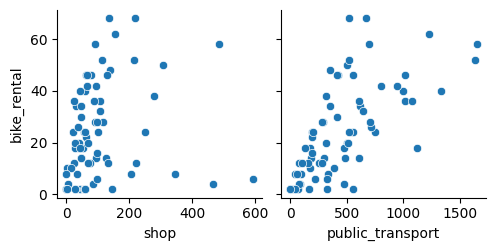

In [22]:
sns.pairplot(df, x_vars=['shop', 'public_transport'], y_vars=['bike_rental'])

<AxesSubplot:xlabel='public_transport', ylabel='bike_rental'>

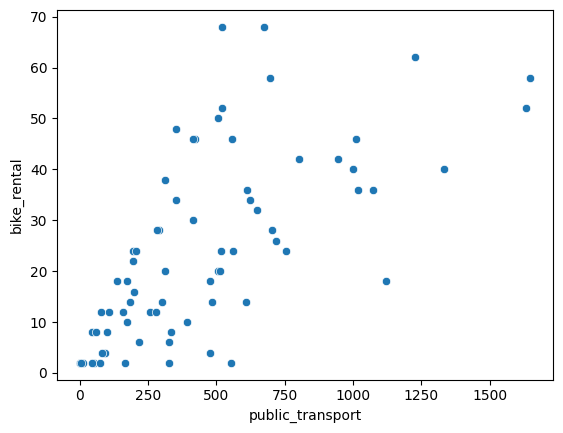

In [14]:
sns.scatterplot(data=df, y='bike_rental', x='public_transport')

<AxesSubplot:xlabel='population_density', ylabel='bike_rental'>

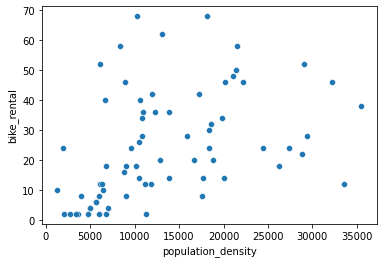

In [16]:
sns.scatterplot(data=df, y='bike_rental', x='population_density')

<AxesSubplot:xlabel='shop', ylabel='bike_rental'>

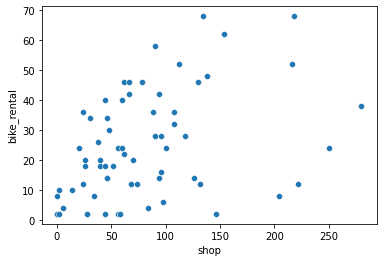

In [18]:
sns.scatterplot(data=df[df['shop']<300], y='bike_rental', x='shop')

In [37]:
df.corr()

,Zipcode,bike_rental,parking,public_transport,schools,shop,population_density
Zipcode,1.000000,-0.249479,0.360667,-0.179097,-0.008904,0.400439,-0.125699
bike_rental,-0.249479,1.000000,-0.082611,0.672247,0.517120,0.195414,0.414713
parking,0.360667,-0.082611,1.000000,-0.147453,-0.095865,0.135601,0.068508
public_transport,-0.179097,0.672247,-0.147453,1.000000,0.718554,0.048300,0.020894
schools,-0.008904,0.517120,-0.095865,0.718554,1.000000,0.065067,0.004415
shop,0.400439,0.195414,0.135601,0.048300,0.065067,1.000000,0.183817
population_density,-0.125699,0.414713,0.068508,0.020894,0.004415,0.183817,1.000000


In [38]:
df.head()

,Zipcode,bike_rental,parking,public_transport,schools,shop,population_density,city
0,50309,24,2,196,0,100,1914.0,Des Moines
1,50311,8,0,46,0,34,6011.0,Des Moines
2,50312,2,2,52,0,44,2701.0,Des Moines
3,50314,4,0,92,0,6,5014.0,Des Moines
4,50315,2,0,2,4,28,3578.0,Des Moines


In [39]:
df.to_csv('./data/processed/main.csv', index=False)

# EDA on the distribution of the number of variables

In [15]:
df = pd.read_csv('./data/processed/main.csv')
df.sample(5)

,Zipcode,bike_rental,parking,public_transport,schools,shop,population_density,city
16,60611,38,10,314,6,280,35505.0,Chicago
2,50312,2,2,52,0,44,2701.0,Des Moines
70,80231,2,20,168,4,58,6813.0,Denver
24,60619,40,0,1000,42,60,10601.0,Chicago
7,60602,14,0,184,0,94,13833.0,Chicago


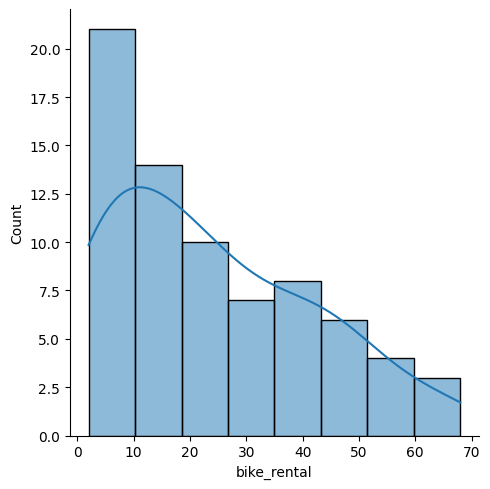

In [9]:
sns.displot(df, x='bike_rental', kde=True)

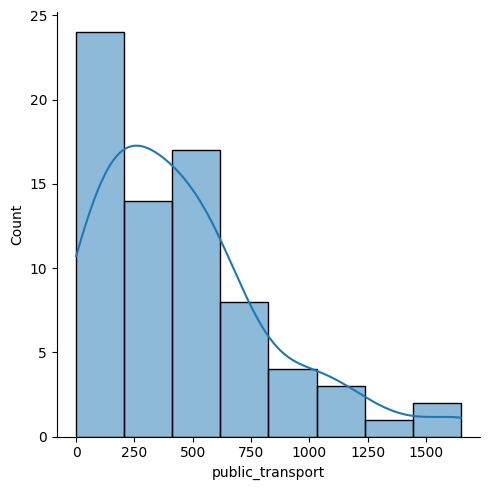

In [8]:
sns.displot(df, x='public_transport', kde=True)

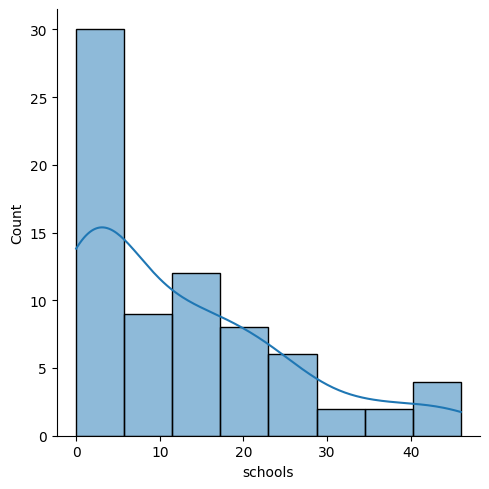

In [11]:
sns.displot(df, x='schools', kde=True)

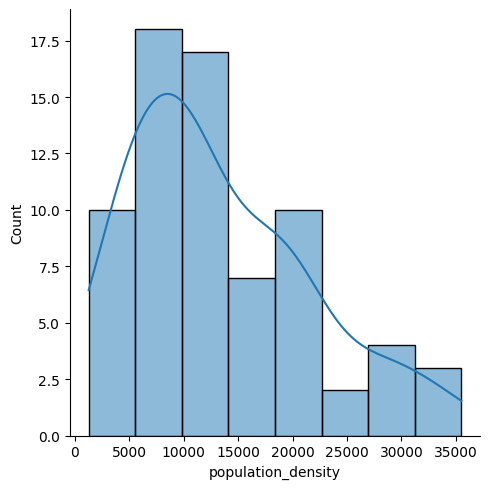

In [12]:
sns.displot(df, x='population_density', kde=True)

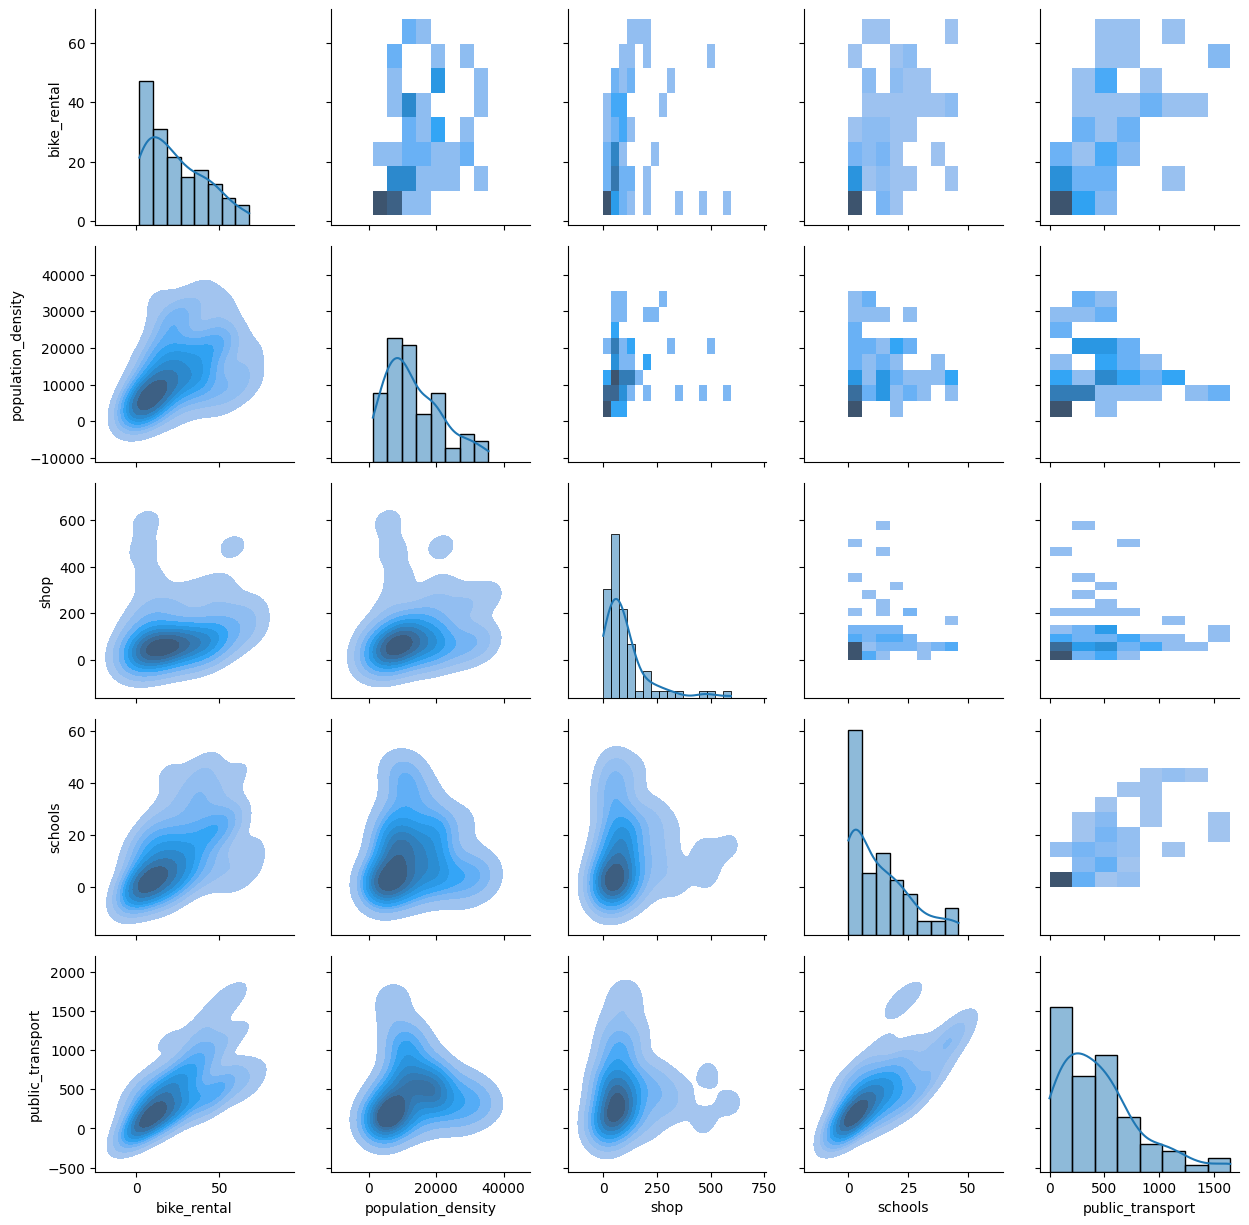

In [24]:
g = sns.PairGrid(df[['bike_rental', 'population_density', 'shop', 'schools', 'public_transport']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Data Normalization

## Logarithmic normalization of the shop column

In [25]:
df['shop_norm'] = np.log(df['shop'])

/Users/jettchen/anaconda3/envs/himcm/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='shop_norm', ylabel='bike_rental'>

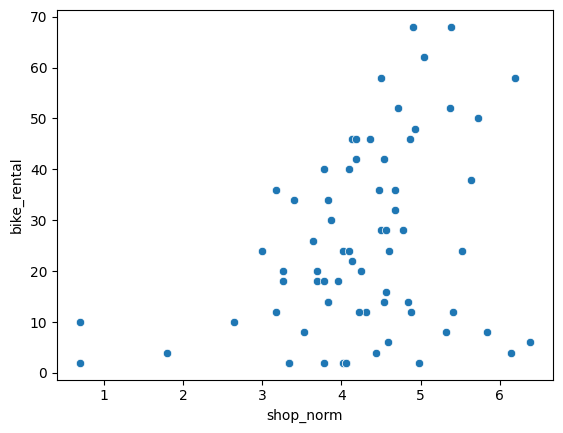

In [30]:
sns.scatterplot(data=df, y='bike_rental', x='shop_norm')